In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Chapter 11: Testing Hypotheses

This chapter will try to answer yes-no questions basing our conclusions on random samples and empirical distributions.

## 11.1 Assessing a Model

Definition of ***model***:
a set of assumptions about data. Our goal is to decide whether or not a model is good.

#### Jury Selection
Robert Swain believed that the selection of jury panel was biased. The population of Jury had 26% black people, but on Robert trail, only 8 out of 100 panelists were black (only 8%).

One view of the data – a model, in other words – is that the panel was selected at random and ended up with a small number of Black panelists just due to chance.

The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are Black. We are in a good position to assess this model for the following reasons.

1. We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are Black.
2. Our simulation will show what a panel would be like if it were selected at random.
3. We can then compare the results of the simulation with the composition of an actual jury panel.
4. If the results of our simulation are not consistent with the composition of the panel in the trial, that will be evidence against the model of random selection. Therefore, it will be evidence against the fairness of the trial.



##### The Statistic

we have to choose a statistic to simulate. The statistic has to be able to help us decide between the model and alternative views about the data.


For Jury Selection, a natural statistic, then, is the number or count of Black panelists in the sample. Small values of the statistic will favor Robert Swain’s viewpoint.

##### Simulating One Value of the Statistic

We can use `sample_proportions` to simulate one value of the statistic. **The sample size is 100, the size of the panel.** The first item in the output array is the proportion of black panelists in the random sample, so the number of black people in the sample is just the proportion times the sample size.

In [2]:
def one_simulated_count(sample_size):
    return sample_size * sample_proportions(sample_size, [0.26, 0.74]).item(0)
one_simulated_count(100)

28.000000000000004

The focus of our analysis is the variability in the counts of black  people. With that, we should generate 10,000 simulated values of the count and see how they vary.

In [3]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count(100))

##### The prediction under the model of Random Selection
To interpret the results of our simulation, we can visualize the results in an empirical histogram of the simulated counts.

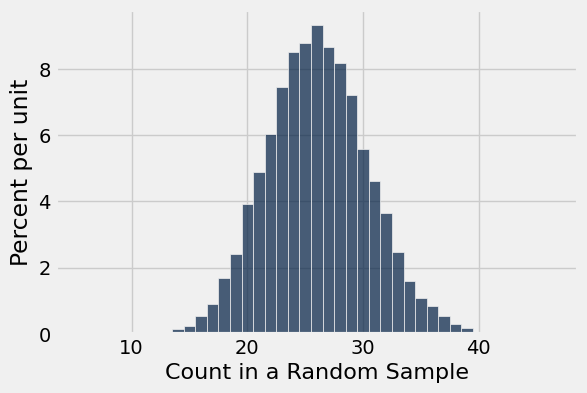

In [4]:
Table().with_column(
    'Count in a Random Sample', counts
    ).hist(bins = np.arange(5.5, 46.6, 1))

#### conclusions
As expected, the most simulated counts are around 26, but not all are 26; there is some variation. The counts range from about 15 to about 40. But the count of 8 black people is very far out in the left hand of the histogram.

While it is *possible* that the panel could have been generated by chance, our simulation demonstrates that it is hugely unlikely. The model a set of assumptions (randomly chosen panelists). When the assumptions are at odds with reality (8 count of black people), we must question those assumptions.

Therefore, the most reasonable conclusions is that the jury panel was ***not*** selected by random sampling from the population of eligible jurors.

When a process produces errors that are systematically in one direction – such as the percentage of Black panelists always being lower than expected – then data scientists say the process is ***biased***. Quantification of such bias is an important responsibility of data science. The statistical bias in the selection process was born out of deep-seated racial bias in the legal system of the time.

## 11.2 Multiple Categories

This time, we will consider panelists from multiple racial and ethnic categories

**Sample Size:**

when the size of a sample is small relative to the size of the population, sampling without replacement resembles sampling with replacement; the proportions in the population don’t change much between draws.

#### A New Statistic: The distance between two Distributions
the *total variation distance*(TVD) between two distributions measures how close the distributions are. The larger the TVD, the more different the two distributions appear.

large values of the distance will be evidence against random selection.

In [5]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

## 11.3 Decisions and Uncertainty

#### Mendel's Model
for every plant, there is a 75% chance that it will have purple flowers, and 25% chance that the flowers will be white, regardless of the colors in all the other plants.

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers.

#### Step 1: The hypotheses

ALl statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called *hypotheses*. 
**The Null hypothesis**: This is a clearly defined model about chances. It says that the data were generated at random under clearly specified assumptions about the randomness. The word 'null' reinforces the idea that if the data looked different from what the null hypothesis predicts, the difference is due to *nothing* but chance.

From a practical perspective, **the null hypothesis is a hypothesis under which you can simulate data.**

For Mendel's model for the color of pea plants, the null hypothesis is that the assumptions of his model are; each plant has a 75% chance of having purple flowers, independent of all other plants.

**The Alterative hypothesis:** This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

In the example about mendel's plants, the alternative hypothesis is simply that this model isn't good. (keep in mind the alterantive doesn't say how or why the model isn't good). It just says the model isn't good.

#####  Step 2: The Test Statistic
In ordre to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the **test statistic**

We will be comparing two categorical distributions; the one in mendel's model and the one we will get in our random sample. We want to see if these two distributions are close to each other or far apart. So a natural test statistic is the TVD developed in the pervious section.

Something interesting happens when we are tying to calculate TVD between two proportions, and there is two categories, the TVD is equal to the distance between the two proportions in one category

**Calculation:**
$$
|0.7 - 0.75| = 0.05 = |0.3 - 0.25|
$$
so the TVD is:
$$
\frac{1}{2}( |0.7 - 0.75| + |0.3 - 0.25|) = 0.5 = |0.7 - 0.75|
$$


Our test statistic will be the distance between the sample percent of purple plants and 75% which is the corresponding percent in Mendel's model.

$$
|\text{sample percent of purple flowering plants - 75}|
$$

To choose a test statistic in other situations, look at the alternative hypothesis. What values of the statistic will make you think that the alternative hypothesis is a better choice than the null?

- If the answer is “big values,” you have a good choice of statistic.
- So also if the answer is “small values.”
- But if the answer is “both big values and small values,” we recommend that you look again at your statistic. See if using a distance instead of a difference can change the answer to just “big values”.

##### Observed Value of the Test Statistic
the ***observed value*** of the test statistic is the value of the statistic you get from the data in the study, not a simulated value.


##### Step 4: The conclusion
If the observed value of the test statistic and the distribution as predicated by the null hypothesis are not consistent with each other, then the data do not support the null hypothesis. We say that the test ***rejects*** the null hypothesis, therefore, the alternative hypothesis is better supported by the data.

Otherwise if they are consistent, we say that the data are ***consistent*** with the null hypothesis.

### The meaning of "consistent"

It is important to understand that whether the observed test statistic is consistent with its predicted distribution under the null hypothesis is a matter of subjective opinion and judgment.


However, if you don't want to use your own judgement, there are conventions that you can follow.

##### conventional cut-offs and the P-value

The conventions are based on the area in the tail, starting at the observed statistic and looking in the direction that makes us lean toward the alternative. In our example, that's the right side, since big distances favor the alternative.

If the area of the tail is small, the observed statistic is far away from the values most commonly predicated by the null hypothesis.

Remember that in a histogram, area represents percent. To find the area in the tail, we have to find the percent of distances that were greater than or equal to 3.2 (the observed statistic).


#### The p-value
This chance has an impressive name. It's called the ***observed significance level*** of the test.

***Definition***: The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

If a p-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis more than they support the null.

How small is “small”? According to the conventions:

- If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”
- If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”

When you make a conclusion in this way, we recommend that you don’t just say whether or not the result is statistically significant. Along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.

## 11.4 Error Probabilities

Summary: If the coin is fair and our test uses a 5% cutoff for deciding whether it is fair or not, then there is about a 5% chance that the test will wrongly conclude that the coin is unfair.


If you use a % cutoff for the p-value, and the null hypothesis happens to be true, then there is about a % chance that your test will conclude that the alternative is true.